### Load the training data & generate the test data

In [1]:
import utils
import tensorflow as tf
from tensorflow.keras import preprocessing
import numpy as np

In [2]:
training_set = np.loadtxt("raw_training_set_1mil.dat", dtype=str, delimiter=',')
labels = np.loadtxt("raw_label_set_1mil.dat", dtype=int, delimiter=',')

In [3]:
# inverted card figures
CF_I = {
    '2':     0,
    '3':     1,
    '4':     2,
    '5':     3,
    '6':     4,
    '7':     5,
    '8':     6,
    '9':     7,
    'T':     8,
    'J':     9,
    'Q':     10,
    'K':     11,
    'A':     12}

CC_I = {
    'S':    0,
    'H':    1,
    'D':    2,
    'C':    3}

### Convert Data into 2D

In [4]:
training_set_2d = []
tmp = []
for han in training_set:
    for cr in han:
        tmp.append(CC_I[cr[0]])
        tmp.append(CF_I[cr[1]])
    training_set_2d.append(tmp)
    tmp =[]

#### Fits elements are symbols and second elements are ranks

In [5]:
training_set_2d[0]

[3, 2, 3, 1, 3, 0, 0, 10, 3, 10, 1, 0, 3, 7]

In [6]:
card_str_list = []
catgory_list = []
for l in range(len(training_set_2d)):
    card_str_list.append(list(training_set_2d[l]))
    catgory_list.append(labels[l])
    
depth = 9
catgory_list = tf.one_hot(catgory_list, depth)

In [7]:
train_dataset = tf.data.Dataset.from_tensor_slices((card_str_list, catgory_list))

#### Test set prep

In [8]:
test_set = []
for i in range(10000):
    New_deck = utils.init_standard_deck()
    chosen_cards, remained_cards = utils.get_random_cards(New_deck, 7)
    test_set.append(utils.Card_Rank(chosen_cards))

In [9]:
tmp_set = []
for z in test_set:
    tmp_set.append(z[4])

In [10]:
test_set_2d = []
tmp = []
for han in tmp_set:
    for cr in han:
        tmp.append(CC_I[cr[0]])
        tmp.append(CF_I[cr[1]])
    test_set_2d.append(tmp)
    tmp =[]

In [12]:
card_str_list = []
catgory_list = []

for row in test_set:
    catgory_list.append(row[0])

depth = 9
catgory_list = tf.one_hot(catgory_list, depth)


In [13]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_set_2d, catgory_list))

In [14]:
test_dataset

<TensorSliceDataset shapes: ((14,), (9,)), types: (tf.int32, tf.float32)>

### Shuffle the data

In [15]:
BUFFER_SIZE = 10
BATCH_SIZE = 100
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

In [16]:
for example, label in train_dataset.take(1):
    print('text: ', example.numpy())
    print('type: ', type(example.numpy()))
    print('label: ', label.numpy())
    print('type: ', type(label.numpy()))

text:  [[ 0  1  1 ...  7  3  8]
 [ 1  2  0 ...  7  2 12]
 [ 3  4  2 ... 10  2  3]
 ...
 [ 2  2  0 ...  1  0  3]
 [ 2  7  3 ...  7  3  1]
 [ 3  7  2 ... 11  1 12]]
type:  <class 'numpy.ndarray'>
label:  [[0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0

### FNN Model

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(14,)),
    tf.keras.layers.Dense(56, activation = 'elu'),
    tf.keras.layers.Dense(56, activation = 'elu'),
    tf.keras.layers.Dense(56, activation = 'elu'),
    tf.keras.layers.Dense(56, activation = 'elu'),
    tf.keras.layers.Dense(56, activation = 'elu'),
    tf.keras.layers.Dense(56, activation = 'elu'),
    tf.keras.layers.Dense(56, activation = 'elu'),
    tf.keras.layers.Dense(56, activation = 'elu'),
    tf.keras.layers.Dense(56, activation = 'elu'),
    tf.keras.layers.Dense(56, activation = 'elu'),
    tf.keras.layers.Dense(9)
])

In [23]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 14)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 56)                840       
_________________________________________________________________
dense_12 (Dense)             (None, 56)                3192      
_________________________________________________________________
dense_13 (Dense)             (None, 56)                3192      
_________________________________________________________________
dense_14 (Dense)             (None, 56)                3192      
_________________________________________________________________
dense_15 (Dense)             (None, 56)                3192      
_________________________________________________________________
dense_16 (Dense)             (None, 56)               

In [25]:
history = model.fit(train_dataset, epochs=120,
                    validation_data=test_dataset, 
                    validation_steps=1)

Epoch 1/120
10000/10000 [==============================] - 11s 1ms/step - loss: 1.4439 - accuracy: 0.4491 - val_loss: 1.3678 - val_accuracy: 0.4300
Epoch 2/120
10000/10000 [==============================] - 11s 1ms/step - loss: 1.3818 - accuracy: 0.4575 - val_loss: 1.3091 - val_accuracy: 0.4700
Epoch 3/120
10000/10000 [==============================] - 11s 1ms/step - loss: 1.3633 - accuracy: 0.4613 - val_loss: 1.2875 - val_accuracy: 0.4600
Epoch 4/120
10000/10000 [==============================] - 11s 1ms/step - loss: 1.3543 - accuracy: 0.4627 - val_loss: 1.2782 - val_accuracy: 0.4600
Epoch 5/120
10000/10000 [==============================] - 11s 1ms/step - loss: 1.3456 - accuracy: 0.4641 - val_loss: 1.2757 - val_accuracy: 0.4700
Epoch 6/120
10000/10000 [==============================] - 11s 1ms/step - loss: 1.3364 - accuracy: 0.4655 - val_loss: 1.2615 - val_accuracy: 0.4700
Epoch 7/120
10000/10000 [==============================] - 12s 1ms/step - loss: 1.3269 - accuracy: 0.4670 - val_

10000/10000 [==============================] - 11s 1ms/step - loss: 0.8590 - accuracy: 0.6493 - val_loss: 0.7366 - val_accuracy: 0.6700
Epoch 57/120
10000/10000 [==============================] - 11s 1ms/step - loss: 0.8549 - accuracy: 0.6516 - val_loss: 0.7309 - val_accuracy: 0.6600
Epoch 58/120
10000/10000 [==============================] - 11s 1ms/step - loss: 0.8503 - accuracy: 0.6543 - val_loss: 0.7140 - val_accuracy: 0.7100
Epoch 59/120
10000/10000 [==============================] - 11s 1ms/step - loss: 0.8456 - accuracy: 0.6571 - val_loss: 0.7293 - val_accuracy: 0.6900
Epoch 60/120
10000/10000 [==============================] - 11s 1ms/step - loss: 0.8414 - accuracy: 0.6596 - val_loss: 0.7219 - val_accuracy: 0.7000
Epoch 61/120
10000/10000 [==============================] - 11s 1ms/step - loss: 0.8367 - accuracy: 0.6623 - val_loss: 0.6998 - val_accuracy: 0.7100
Epoch 62/120
10000/10000 [==============================] - 11s 1ms/step - loss: 0.8321 - accuracy: 0.6648 - val_loss: 

Epoch 111/120
10000/10000 [==============================] - 11s 1ms/step - loss: 0.6025 - accuracy: 0.7779 - val_loss: 0.4623 - val_accuracy: 0.8100
Epoch 112/120
10000/10000 [==============================] - 11s 1ms/step - loss: 0.5982 - accuracy: 0.7799 - val_loss: 0.4798 - val_accuracy: 0.8000
Epoch 113/120
10000/10000 [==============================] - 11s 1ms/step - loss: 0.5943 - accuracy: 0.7817 - val_loss: 0.4623 - val_accuracy: 0.7900
Epoch 114/120
10000/10000 [==============================] - 12s 1ms/step - loss: 0.5905 - accuracy: 0.7834 - val_loss: 0.4553 - val_accuracy: 0.8100
Epoch 115/120
10000/10000 [==============================] - 11s 1ms/step - loss: 0.5866 - accuracy: 0.7854 - val_loss: 0.4486 - val_accuracy: 0.8300
Epoch 116/120
10000/10000 [==============================] - 11s 1ms/step - loss: 0.5832 - accuracy: 0.7871 - val_loss: 0.4242 - val_accuracy: 0.8300
Epoch 117/120
10000/10000 [==============================] - 11s 1ms/step - loss: 0.5795 - accuracy:

In [26]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

100/100 [==============================] - 0s 680us/step - loss: 0.5725 - accuracy: 0.7958
Test Loss: 0.5724713206291199
Test Accuracy: 0.795799970626831


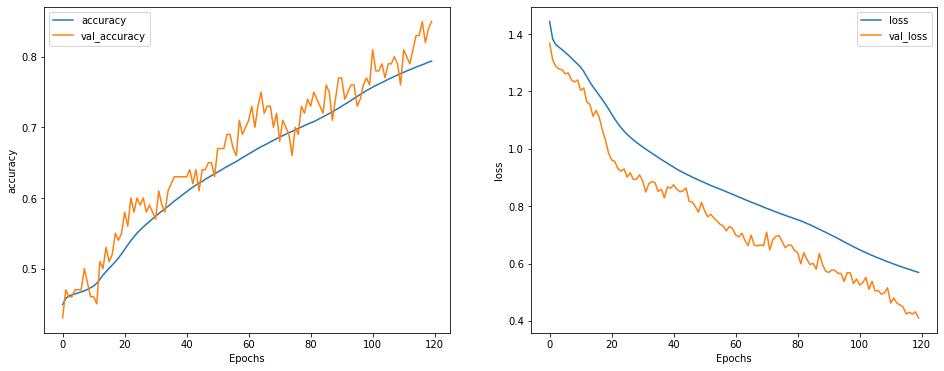

In [27]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.subplot(1,2,2)
plot_graphs(history, 'loss')

## RRNN Model

In [29]:
i = tf.keras.layers.Input(shape=(14,))
x = tf.keras.layers.Flatten(input_shape=(14,))(i)
x = tf.keras.layers.Dense(54, activation = None)(x)
i_res = x

x = tf.keras.layers.Dense(54, activation = 'relu')(x)
x = tf.keras.layers.add([x, i_res])
x = tf.keras.layers.LayerNormalization()(x)

x = tf.keras.layers.Dense(54, activation = 'relu')(x)
x = tf.keras.layers.add([x, i_res])
x = tf.keras.layers.LayerNormalization()(x)

x = tf.keras.layers.Dense(54, activation = 'relu')(x)
x = tf.keras.layers.add([x, i_res])
x = tf.keras.layers.LayerNormalization()(x)

x = tf.keras.layers.Dense(54, activation = 'relu')(x)
x = tf.keras.layers.add([x, i_res])
x = tf.keras.layers.LayerNormalization()(x)

x = tf.keras.layers.Dense(54, activation = 'relu')(x)
x = tf.keras.layers.add([x, i_res])
x = tf.keras.layers.LayerNormalization()(x)

x = tf.keras.layers.Dense(54, activation = 'relu')(x)
x = tf.keras.layers.add([x, i_res])
x = tf.keras.layers.LayerNormalization()(x)

x = tf.keras.layers.Dense(54, activation = 'relu')(x)
x = tf.keras.layers.add([x, i_res])
x = tf.keras.layers.LayerNormalization()(x)

x = tf.keras.layers.Dense(54, activation = 'relu')(x)
x = tf.keras.layers.add([x, i_res])
x = tf.keras.layers.LayerNormalization()(x)

x = tf.keras.layers.Dense(54, activation = 'relu')(x)
x = tf.keras.layers.add([x, i_res])
x = tf.keras.layers.LayerNormalization()(x)

x = tf.keras.layers.Flatten(input_shape=(14,))(x)

x = tf.keras.layers.Dense(9)(x)



In [30]:
model = tf.keras.models.Model(i, x)

In [31]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [32]:
print(model.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 14)]         0                                            
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 14)           0           input_1[0][0]                    
__________________________________________________________________________________________________
dense_22 (Dense)                (None, 54)           810         flatten_2[0][0]                  
__________________________________________________________________________________________________
dense_23 (Dense)                (None, 54)           2970        dense_22[0][0]                   
_______________________________________________________________________________________

In [33]:
history = model.fit(train_dataset, epochs=120,
                    validation_data=test_dataset, 
                    validation_steps=1)

Epoch 1/120
10000/10000 [==============================] - 35s 3ms/step - loss: 1.5060 - accuracy: 0.4374 - val_loss: 1.4474 - val_accuracy: 0.4300
Epoch 2/120
10000/10000 [==============================] - 40s 4ms/step - loss: 1.4595 - accuracy: 0.4459 - val_loss: 1.3668 - val_accuracy: 0.4400
Epoch 3/120
10000/10000 [==============================] - 37s 4ms/step - loss: 1.4195 - accuracy: 0.4527 - val_loss: 1.3512 - val_accuracy: 0.4600
Epoch 4/120
10000/10000 [==============================] - 39s 4ms/step - loss: 1.3920 - accuracy: 0.4552 - val_loss: 1.3198 - val_accuracy: 0.4400
Epoch 5/120
10000/10000 [==============================] - 45s 4ms/step - loss: 1.3633 - accuracy: 0.4600 - val_loss: 1.2752 - val_accuracy: 0.4400
Epoch 6/120
10000/10000 [==============================] - 34s 3ms/step - loss: 1.3310 - accuracy: 0.4685 - val_loss: 1.2646 - val_accuracy: 0.4500
Epoch 7/120
10000/10000 [==============================] - 34s 3ms/step - loss: 1.2977 - accuracy: 0.4791 - val_

10000/10000 [==============================] - 33s 3ms/step - loss: 0.2797 - accuracy: 0.9088 - val_loss: 0.1696 - val_accuracy: 0.9500
Epoch 57/120
10000/10000 [==============================] - 34s 3ms/step - loss: 0.2762 - accuracy: 0.9096 - val_loss: 0.1555 - val_accuracy: 0.9600
Epoch 58/120
10000/10000 [==============================] - 34s 3ms/step - loss: 0.2789 - accuracy: 0.9096 - val_loss: 0.1490 - val_accuracy: 0.9500
Epoch 59/120
10000/10000 [==============================] - 33s 3ms/step - loss: 0.2763 - accuracy: 0.9103 - val_loss: 0.1424 - val_accuracy: 0.9500
Epoch 60/120
10000/10000 [==============================] - 32s 3ms/step - loss: 0.2751 - accuracy: 0.9104 - val_loss: 0.1414 - val_accuracy: 0.9500
Epoch 61/120
10000/10000 [==============================] - 37s 4ms/step - loss: 0.2737 - accuracy: 0.9113 - val_loss: 0.1858 - val_accuracy: 0.9300
Epoch 62/120
10000/10000 [==============================] - 38s 4ms/step - loss: 0.2713 - accuracy: 0.9118 - val_loss: 

Epoch 111/120
10000/10000 [==============================] - 41s 4ms/step - loss: 0.2359 - accuracy: 0.9235 - val_loss: 0.2294 - val_accuracy: 0.9100
Epoch 112/120
10000/10000 [==============================] - 42s 4ms/step - loss: 0.2371 - accuracy: 0.9236 - val_loss: 0.0993 - val_accuracy: 0.9600
Epoch 113/120
10000/10000 [==============================] - 49s 5ms/step - loss: 0.2358 - accuracy: 0.9242 - val_loss: 0.1546 - val_accuracy: 0.9500
Epoch 114/120
10000/10000 [==============================] - 41s 4ms/step - loss: 0.2350 - accuracy: 0.9240 - val_loss: 0.0976 - val_accuracy: 0.9600
Epoch 115/120
10000/10000 [==============================] - 34s 3ms/step - loss: 0.2345 - accuracy: 0.9241 - val_loss: 0.1002 - val_accuracy: 0.9600
Epoch 116/120
10000/10000 [==============================] - 37s 4ms/step - loss: 0.2333 - accuracy: 0.9247 - val_loss: 0.0868 - val_accuracy: 0.9700
Epoch 117/120
10000/10000 [==============================] - 48s 5ms/step - loss: 0.2352 - accuracy:

In [35]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

100/100 [==============================] - 0s 2ms/step - loss: 0.2157 - accuracy: 0.9307
Test Loss: 0.21568991243839264
Test Accuracy: 0.9307000041007996


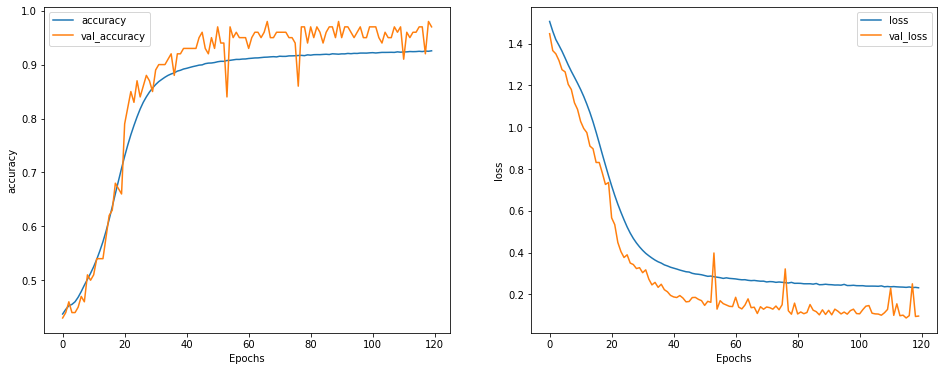

In [36]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.subplot(1,2,2)
plot_graphs(history, 'loss')